## Agenda

[Cycles Notes](#Cycles-Notes)<br>

[](#)<br>
&nbsp;[](#)<br>
&nbsp;[](#)<br>
&nbsp;[](#)<br>
&nbsp;[](#)<br>
&nbsp;[](#)<br>
&nbsp;[](#)<br>

&nbsp;&nbsp;[](#)<br>
&nbsp;&nbsp;[](#)<br>
&nbsp;&nbsp;[](#)<br>
&nbsp;&nbsp;[](#)<br>
&nbsp;&nbsp;[](#)<br>
&nbsp;&nbsp;[](#)<br>

# Cycles Notes

**1st - .**

**2nd - .**

**3rd - .**

In [2]:
from notebook_utils.utils import *

import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import pacf, acf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

In [3]:
directory = Directory("1.2-pr-sales-prediction-time-series-analysis")

In [70]:
def fig(x, y):
    plt.rcParams['figure.figsize'] = (x, y)

## 0.0 Loading Data

In [4]:
data_frame_to_process = pd.read_pickle(os.path.join(os.path.join(directory.DATA_DIR, "sales_forecast_data"), "ml_data_to_preprocess.pkl"))
data_frame_to_process['revenue'] = data_frame_to_process['freight_value'] + data_frame_to_process['price']

In [5]:
df = data_frame_to_process.groupby([data_frame_to_process['order_purchase_timestamp'].dt.date])[['revenue']].sum()
df.index = pd.to_datetime(df.index)
df.head()

,revenue
order_purchase_timestamp,
2017-01-05,707.27
2017-01-06,988.28
2017-01-07,1447.99
2017-01-08,507.85
2017-01-09,774.51


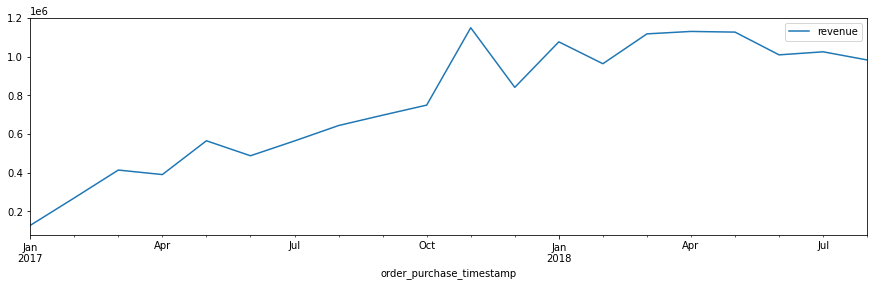

In [7]:
df.resample('M').sum().plot(figsize=(15,4));

## 1.0 Decomposition

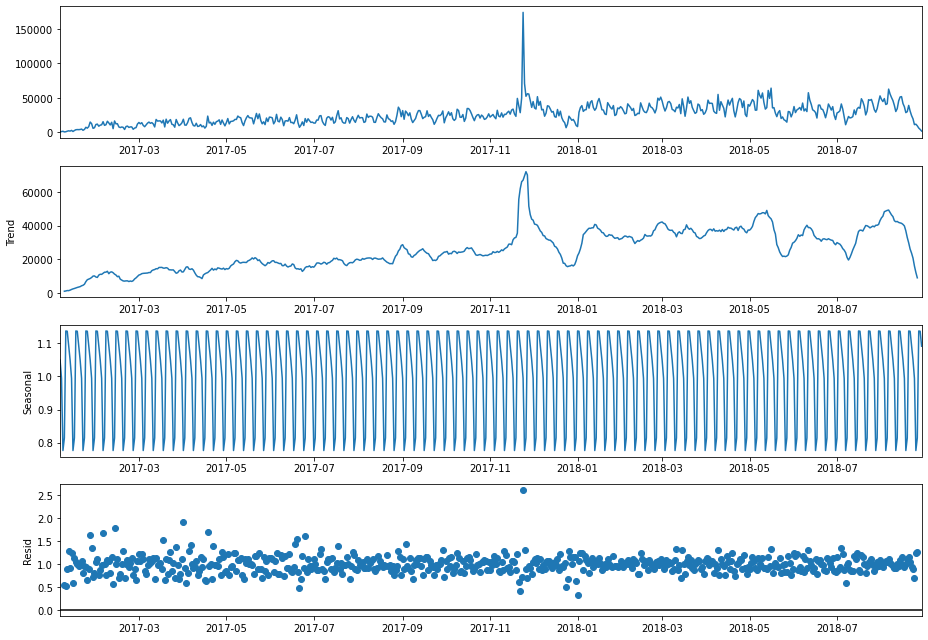

In [71]:
fig(13, 9)
decomposition = seasonal_decompose(df, model='multiplicative')
decomposition.plot()
plt.show()

## 2.0 Autocorrelation

Autocorrelation for daily revenue with lag equals 1: 76.0%
Autocorrelation for daily revenue with lag equals 2: 65.0%
Autocorrelation for daily revenue with lag equals 3: 62.0%
Autocorrelation for daily revenue with lag equals 4: 61.0%
Autocorrelation for daily revenue with lag equals 5: 58.0%
Autocorrelation for daily revenue with lag equals 6: 61.0%
Autocorrelation for daily revenue with lag equals 7: 65.0%


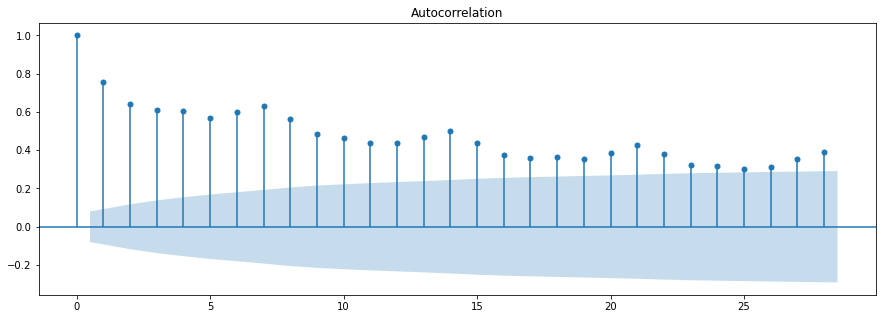

In [72]:
for lag in range(1, 8):
    autocorrelation = df['revenue'].autocorr(lag)
    print(f"Autocorrelation for daily revenue with lag equals {lag}: {np.round(autocorrelation*100)}%" )

fig(15, 5)
plot_acf(df['revenue'], alpha = 0.05);

Autocorrelation for weekly revenue with lag equals 1: 88.0%
Autocorrelation for weekly revenue with lag equals 2: 91.0%
Autocorrelation for weekly revenue with lag equals 3: 83.0%
Autocorrelation for weekly revenue with lag equals 4: 81.0%
Autocorrelation for weekly revenue with lag equals 5: 75.0%
Autocorrelation for weekly revenue with lag equals 6: 76.0%
Autocorrelation for weekly revenue with lag equals 7: 53.0%


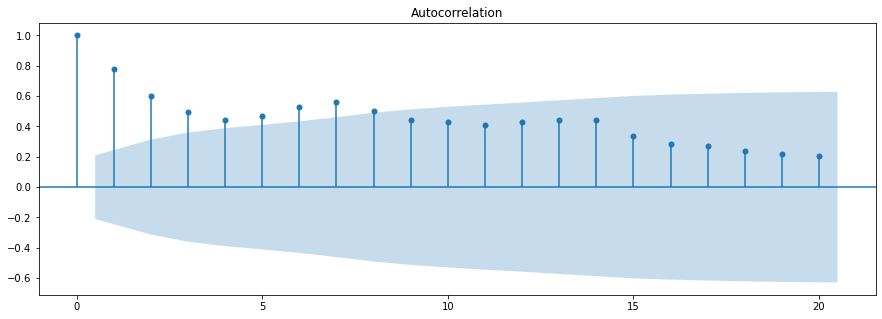

In [84]:
for lag in range(1, 8):
    autocorrelation = df['revenue'].resample("M").sum().autocorr(lag)
    print(f"Autocorrelation for weekly revenue with lag equals {lag}: {np.round(autocorrelation*100)}%" )

plot_acf(df['revenue'].resample('W').sum(), alpha = 0.05);

Autocorrelation for monthly revenue with lag equals 1: 88.0%
Autocorrelation for monthly revenue with lag equals 2: 91.0%
Autocorrelation for monthly revenue with lag equals 3: 83.0%
Autocorrelation for monthly revenue with lag equals 4: 81.0%
Autocorrelation for monthly revenue with lag equals 5: 75.0%
Autocorrelation for monthly revenue with lag equals 6: 76.0%
Autocorrelation for monthly revenue with lag equals 7: 53.0%


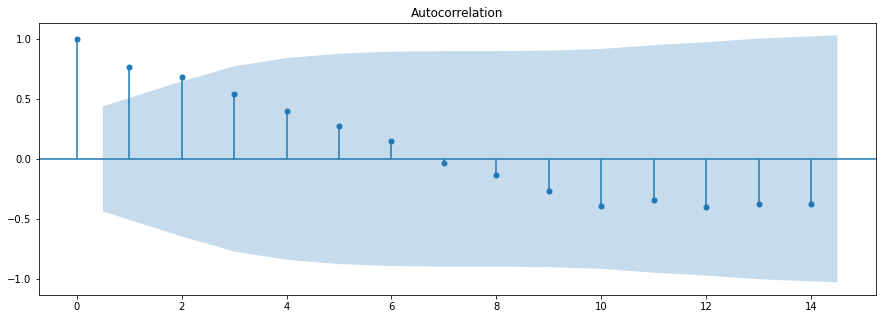

In [90]:
for lag in range(1, 8):
    autocorrelation = df['revenue'].resample("M").sum().autocorr(lag)
    print(f"Autocorrelation for monthly revenue with lag equals {lag}: {np.round(autocorrelation*100)}%" )

plot_acf(df['revenue'].resample('M').sum(), alpha = 0.05);

## 3.0 Partial Autocorrelation

- Day
- Week
- Month

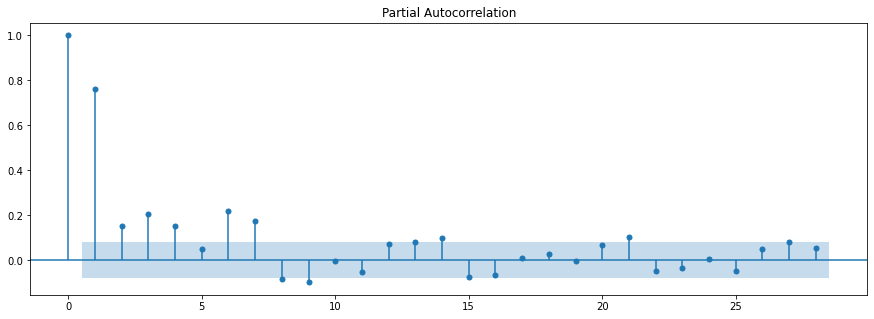

In [77]:
plot_pacf(df['revenue'], alpha = 0.05);

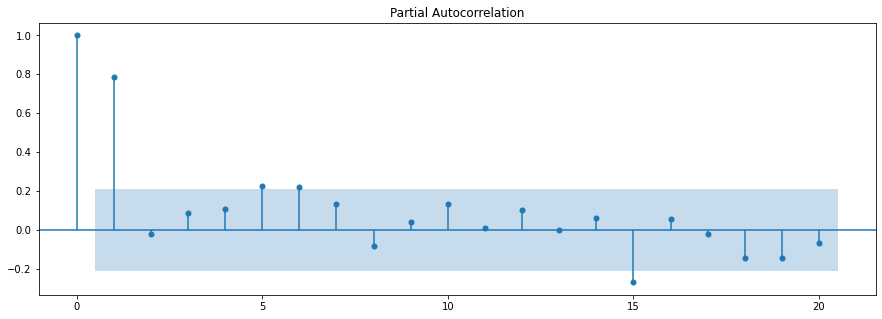

In [85]:
plot_pacf(df['revenue'].resample('W').sum(), alpha = 0.05);

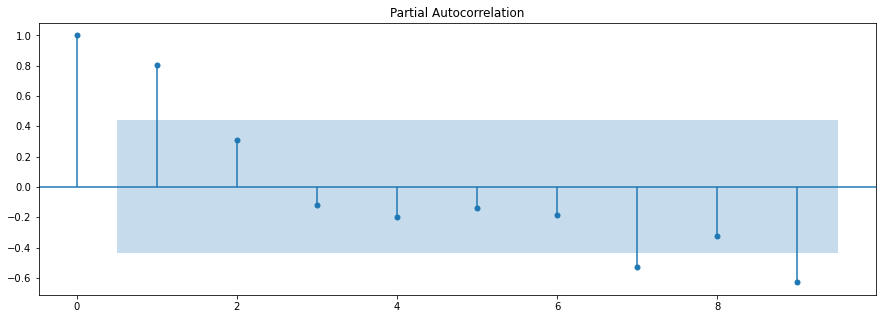

In [83]:
plot_pacf(df['revenue'].resample('M').sum(), lags=9 ,alpha = 0.05);

In [ ]:
from statsmodels.tsa.stattools import adfuller
X = df['revenue']
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))